In [6]:
import sys
import numpy as np
from numpy.linalg import norm
import scipy.io
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

C:\Pleaswork\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  


In [8]:
mat = scipy.io.loadmat('D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/Stat441 A1/0_1_2.mat')
df = mat['X']
dft = df.transpose()
dft.shape

(300, 64)

In [10]:
# Calculating the mean vectors
u1 = dft[0:100,:].mean(axis=0).reshape((1,64))
u2 = dft[100:200,:].mean(axis=0).reshape((1,64))
u3 = dft[200:300,:].mean(axis=0).reshape((1,64))
print(u1.shape)
print(u2.shape)
print(u3.shape)


(1, 64)
(1, 64)
(1, 64)


In [11]:
# Calculating within-class scatter matrices
s1 = np.zeros((64,64))
s2 = np.zeros((64,64))
s3 = np.zeros((64,64))

for row in dft[0:100,:]:
    row = row.reshape(64,1)
    s1 += np.matmul((row - u1),(row-u1).T)
for row in dft[100:200,:]:
    row = row.reshape(64,1)
    s2 += np.matmul((row - u2),(row-u1).T)
for row in dft[200:300,:]:
    row = row.reshape(64,1)
    s3 += np.matmul((row - u3),(row-u1).T)
Sw = s1 + s2 + s3
Sw.shape


(64, 64)

In [12]:
# Calculating between-class scatter matrices
overall_mean = np.mean(dft, axis=0)
overall_mean = np.reshape(overall_mean, (64,1))
u1 = np.reshape(u1, (64,1))
u2 = np.reshape(u2, (64,1))
u3 = np.reshape(u3, (64,1))
Sb = 100*np.matmul((u1 - overall_mean),(u1 - overall_mean).T) + 100*np.matmul((u2 - overall_mean),(u2 - overall_mean).T) + 100*np.matmul((u3 - overall_mean),(u3 - overall_mean).T)
Sb.shape


(64, 64)

In [13]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
print(eig_vals.shape)
print(eig_vecs.shape)


(64,)
(64, 64)


In [15]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(64,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(Sw).dot(Sb).dot(eigv),
                                        eig_vals[i] * eigv,
                                        decimal=6, err_msg='', verbose=True)

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])


Eigenvalues in decreasing order:

0.014206198481527826
0.014091398119733842
9.739859718278602e-17
8.742204225984198e-17
6.959544629066328e-17
6.210696520941808e-17
4.741860981611312e-17
4.470106578691867e-17
4.1651305864100993e-17
4.1651305864100993e-17
3.03057729363756e-17
3.03057729363756e-17
2.979894429750794e-17
2.8930121958789285e-17
2.8930121958789285e-17
2.78944884378602e-17
2.4230497685615296e-17
2.4230497685615296e-17
2.3270405894330007e-17
2.3270405894330007e-17
2.1564618422685087e-17
2.1564618422685087e-17
1.961799646145959e-17
1.961799646145959e-17
1.8758709154122752e-17
1.8758709154122752e-17
1.7551211004589484e-17
1.6930169431453887e-17
1.387977540891006e-17
1.387977540891006e-17
1.3828886161588392e-17
1.3828886161588392e-17
1.353709325800195e-17
1.353709325800195e-17
1.3292516475123497e-17
1.3292516475123497e-17
1.1805466628006483e-17
1.1805466628006483e-17
1.1312779967875392e-17
8.61878757263884e-18
8.61878757263884e-18
8.075359397983554e-18
7.785936228589627e-18
7.7859

In [17]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 50.20%
eigenvalue 2: 49.80%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%
eigenvalue 21: 0.00%
eigenvalue 22: 0.00%
eigenvalue 23: 0.00%
eigenvalue 24: 0.00%
eigenvalue 25: 0.00%
eigenvalue 26: 0.00%
eigenvalue 27: 0.00%
eigenvalue 28: 0.00%
eigenvalue 29: 0.00%
eigenvalue 30: 0.00%
eigenvalue 31: 0.00%
eigenvalue 32: 0.00%
eigenvalue 33: 0.00%
eigenvalue 34: 0.00%
eigenvalue 35: 0.00%
eigenvalue 36: 0.00%
eigenvalue 37: 0.00%
eigenvalue 38: 0.00%
eigenvalue 39: 0.00%
eigenvalue 40: 0.00%
eigenvalue 41: 0.00%
eigenvalue 42: 0.00%
eigenvalue 43: 0.00%
eigenvalue 44: 0.00%
eigenvalue 45: 0.00%
eigenvalue 46: 0.00%
eigenvalue 47: 0.00%

In [18]:
W = np.hstack((eig_pairs[0][1].reshape(64,1), eig_pairs[1][1].reshape(64,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.49297847  0.11555882]
 [ 0.1643801   0.11554127]
 [-0.10848272  0.01080208]
 [-0.03070909  0.06501444]
 [-0.05289179  0.04574709]
 [ 0.03746294 -0.00815163]
 [-0.07397434  0.05456382]
 [ 0.01471517 -0.2403825 ]
 [-0.10679185  0.22461002]
 [-0.0039239   0.03487992]
 [ 0.04392542  0.14145974]
 [ 0.01010245  0.03673356]
 [ 0.02274563 -0.01625175]
 [-0.02162177  0.05633167]
 [ 0.01796709 -0.22670831]
 [ 0.05242456  0.13106499]
 [ 0.05255097  0.01039563]
 [-0.06890084 -0.1568363 ]
 [ 0.013711   -0.04882741]
 [-0.17356751  0.03820385]
 [ 0.01988122  0.04089733]
 [ 0.13564259 -0.09942269]
 [ 0.06355454  0.10689484]
 [ 0.0067414   0.07682407]
 [ 0.26978997 -0.41383985]
 [ 0.11036146 -0.2111628 ]
 [ 0.26135949 -0.243779  ]
 [ 0.35645909 -0.31940319]
 [ 0.01528293 -0.11538471]
 [-0.08925286 -0.03645208]
 [-0.03146203 -0.02626235]
 [ 0.19360043 -0.02582024]
 [ 0.24836177  0.1215557 ]
 [ 0.18758683  0.09457413]
 [-0.26716795  0.04225971]
 [-0.05913872 -0.1397933 ]
 [ 0.1533653  -0.

In [19]:
Y = dft.dot(W)
Y.shape

(300, 2)

C:\Pleaswork\lib\site-packages\matplotlib\transforms.py:949: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 0] = interval
C:\Pleaswork\lib\site-packages\matplotlib\transforms.py:954: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval
C:\Pleaswork\lib\site-packages\matplotlib\text.py:1785: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
C:\Pleaswork\lib\site-packages\matplotlib\text.py:1787: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


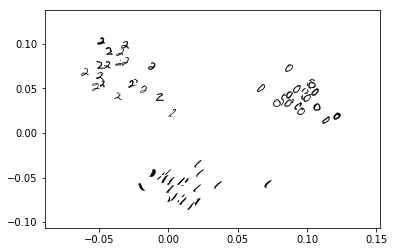

In [20]:
X=np.reshape(mat['X'], (8,8,300))

def plotimages(images, Y, scale=0.9, proportion=0.2):
    '''
    Input:
        images: images, must be in a 3-dimensional matrix (x by y by n)
            e.g. if X is 64 by 400 and size of each image is 8 by 8, images=np.reshape(X,(8,8,400));
        Y: coordinates of where to plot the image (Y(1,:) by Y(2,:)
        scale: scale of each image wrt to figure size (scale <= 1, e.g. 0.8)
        proportion: proportion of the data to be ploted (proportion <= 1)
            e.g. if there are 400 data points proportion = 1, plots
            all 400 data points and proportion = 0.5 plot only 200 data points 
            (i.e. 1th, 3th, 5th, ...)
    '''
    Y /= norm(Y, axis = 1, ord=2).reshape((Y.shape[0],1))
    
    inc = np.floor(1/proportion)
    
    image_width = images.shape[0]
    image_height = images.shape[1] 
    n_images = images.shape[2]
    
    plt.gray()
    fig = plt.gcf()
    fig.clf()
    ax = plt.subplot(111)
    ax.set_xlim((Y[0,:].min()*1.2,Y[0,:].max()*1.2))
    ax.set_ylim((Y[1,:].min()*1.2,Y[1,:].max()*1.2))
    
    for counter in np.arange(0,n_images,inc):
        counter = int(counter)
        xy = (Y[0,counter],Y[1,counter])
        current_image = 1-np.reshape(images[:,:,counter], (image_width,image_height))
        imagebox = OffsetImage(current_image, zoom=scale)
        ab = AnnotationBbox(imagebox, xy, xybox=(1., -1.), xycoords='data', boxcoords="offset points", frameon=False)                                  
        ax.add_artist(ab)
        plt.draw()
    plt.show()
    
plotimages(X, Y.transpose())
